# Exploratory Data Analysis (EDA)

This notebook walks through common EDA steps using a small sample dataset of student study hours and grades.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
df = pd.DataFrame({
    'student_id': range(1,21),
    'hours_studied': [1,2,3,2,5,6,7,8,5,4,3,6,7,8,2,1,9,10,4,5],
    'grade': [55,60,65,63,72,75,78,85,70,68,66,80,82,88,62,58,90,92,69,74]
})
df.head()

,student_id,hours_studied,grade
0,1,1,55
1,2,2,60
2,3,3,65
3,4,2,63
4,5,5,72


In [2]:
## Inspect structure & summary stats
# Save the EDA sample dataset to CSV and read it back
csv_path = 'eda_students_sample.csv'
df.to_csv(csv_path, index=False)
print('Saved', csv_path)
pd.read_csv(csv_path).head()

Saved eda_students_sample.csv


,student_id,hours_studied,grade
0,1,1,55
1,2,2,60
2,3,3,65
3,4,2,63
4,5,5,72


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   student_id     20 non-null     int64
 1   hours_studied  20 non-null     int64
 2   grade          20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


,student_id,hours_studied,grade
count,20.00000,20.000000,20.000000
mean,10.50000,4.900000,72.600000
std,5.91608,2.693071,10.951568
min,1.00000,1.000000,55.000000
25%,5.75000,2.750000,64.500000
50%,10.50000,5.000000,71.000000
75%,15.25000,7.000000,80.500000
max,20.00000,10.000000,92.000000


## Missing values & duplicates

In [4]:
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

## Univariate plots: histograms & boxplots

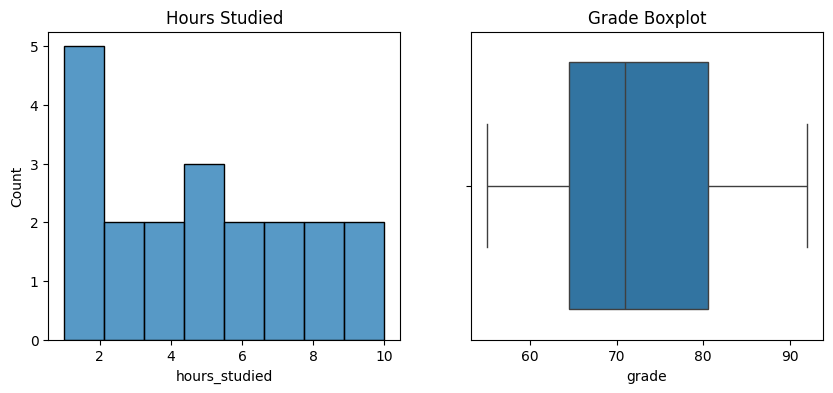

In [5]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['hours_studied'], bins=8)
plt.title('Hours Studied')

plt.subplot(1,2,2)
sns.boxplot(x=df['grade'])
plt.title('Grade Boxplot')
plt.show()

## Bivariate analysis: scatter (hours vs grade) and correlation

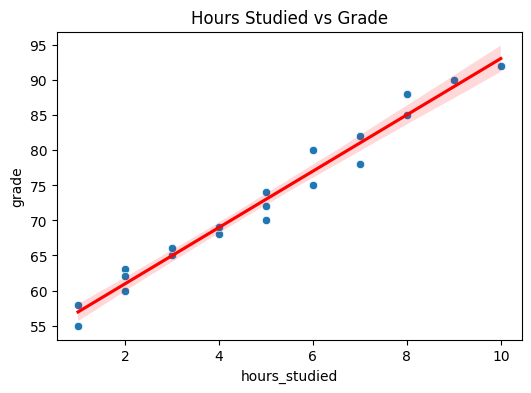

,hours_studied,grade
hours_studied,1.000000,0.987198
grade,0.987198,1.000000


In [6]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='hours_studied', y='grade')
sns.regplot(data=df, x='hours_studied', y='grade', scatter=False, color='red')
plt.title('Hours Studied vs Grade')
plt.show()

# Correlation
df[['hours_studied','grade']].corr()

## Multivariate quick check: pairplot and heatmap

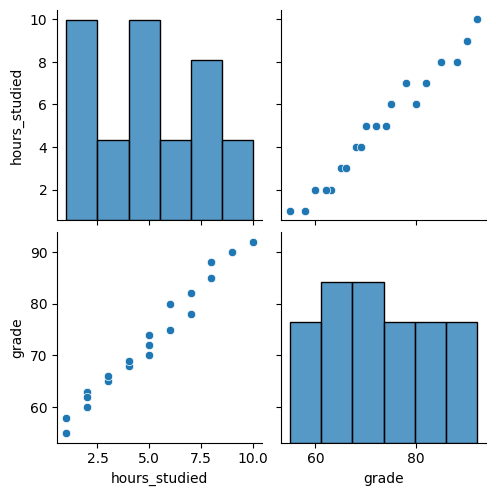

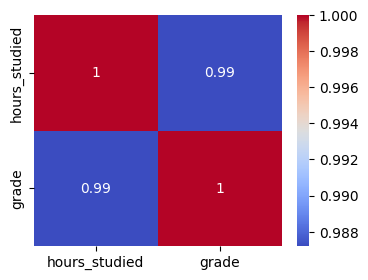

In [7]:
sns.pairplot(df[['hours_studied','grade']])
plt.show()

plt.figure(figsize=(4,3))
sns.heatmap(df[['hours_studied','grade']].corr(), annot=True, cmap='coolwarm')
plt.show()

## Next steps after EDA:
* Form hypotheses (e.g., more study hours → higher grades)
* Prepare features for modeling or deeper analysis
* Segment students by performance groups for targeted interventions